<a href="https://colab.research.google.com/github/jamesluttringer2019/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import math
sales = [3505,2400,3027,2798,3700,3250,2689]

In [0]:
#function to calculate mean, variance, and standard deviation
def mean_std_var(lst):
  top = 0
  x= sum(lst)
  mean = x/len(lst)
  for i in lst:
    top += ((i-mean)**2)

  var = top/(len(lst)-1)
  std = math.sqrt(var)
  print('Mean: '+ str(mean))
  print('Variance: ' + str(var))
  print('Standard Deviation: '+str(std))
  return (mean,var,std)

In [0]:
#call the function
sales_vals = mean_std_var(sales)

Mean: 3052.714285714286
Variance: 214387.90476190473
Standard Deviation: 463.0204150595357


In [0]:
#double check the results
print(np.mean(sales))
print(np.var(sales,ddof=1))
np.std(sales,ddof=1)


3052.714285714286
214387.90476190473


463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import matplotlib.pyplot as plt

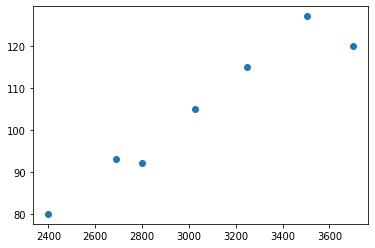

In [0]:
cust = [127,80,105,92,120,115,93]
sales_v_cust = {'Sales':sales, 'Customers':cust}

#put the lists into a dataframe
df = pd.DataFrame(sales_v_cust)

#quick plot to visualize
plt.scatter(df.Sales,df.Customers)
plt.show()

In [0]:
#create variance-covariance matrix
df.cov()

,Sales,Customers
Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381


The covariance is 7604.357143

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cust_vals = mean_std_var(cust)

Mean: 104.57142857142857
Variance: 290.95238095238096
Standard Deviation: 17.057326313123664


In [0]:
cov = 7604.357143
#calculate the correlation coefficient (r)
r = cov/(sales_vals[2]*cust_vals[2])
print(r)

0.962833977832979


In [0]:
#check work
df.corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#create dataframe with only numeric data
titanic_numeric = titanic.select_dtypes(np.number)
titanic_numeric

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.000000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.916700,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.000000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.000000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.000000,1.0,2.0,151.5500,NaN,1
...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,29.881135,1.0,0.0,14.4542,NaN,0
1306,1307,3.0,0.0,26.500000,0.0,0.0,7.2250,304.0,0
1307,1308,3.0,0.0,27.000000,0.0,0.0,7.2250,NaN,0
1308,1309,3.0,0.0,29.000000,0.0,0.0,7.8750,NaN,0


In [0]:
#covariance matrix
titanic_numeric.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#correlation matrix
titanic_numeric.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular

(-3, 5)

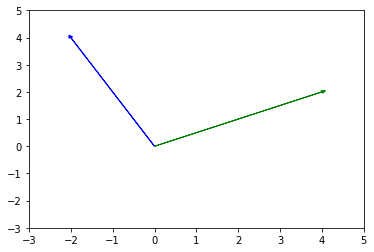

In [0]:
v1 = [-2,4]
v2 = [4,2]

plt.arrow(0,0,v1[0],v1[1],head_width=.1,head_length=.1,color='b')
plt.arrow(0,0,v2[0],v2[1],head_width=.1,head_length=.1,color='g')
plt.xlim(-3,5)
plt.ylim(-3,5)

In [0]:
#check dot product
np.dot(v1,v2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5,3,7]
b = [6,-8,2]
np.dot(a,b)

-40

The vectors are not orthogonal because their dot product is not 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [53]:
c = np.array([[2,-15,6,20]])
x=0
#by hand with numpy
#for i in c:
#  x+= i**2
#math.sqrt(x)

norm_c = np.linalg.norm(c)
norm_c

25.787593916455254

In [54]:
#square the norm
norm_c**2

665.0

In [49]:
np.dot(c,c)

665

In [56]:
c_t = c.T
np.matmul(c_t,c)

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

$c \cdot c = ||c||^{2} =$ sum of main diagonal of $c^{T}c$

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i}+12\hat{j}$

$e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix}+ (-8)\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}$

 ## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
f_norm = np.linalg.norm(f)

In [0]:
#turn f into unit vector by multiplying by 1/||f||
f_unit = np.multiply((1/f_norm),f)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

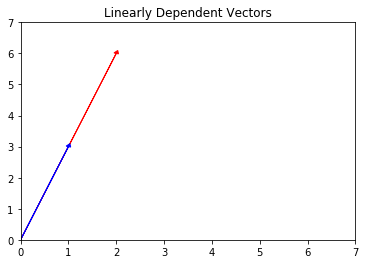

In [0]:
#plot dependent
vect = [1,3]
vect2 = np.multiply(2,vect)

#set the bounds of the graph
plt.xlim(0,7)
plt.ylim(0,7)

#plot the vectors
plt.arrow(0,0,vect2[0],vect2[1],head_width=.1,head_length=.1,color='r')
plt.arrow(0,0,vect[0],vect[1],head_width=.1,head_length=.1,color='b')


plt.title('Linearly Dependent Vectors')
plt.show()

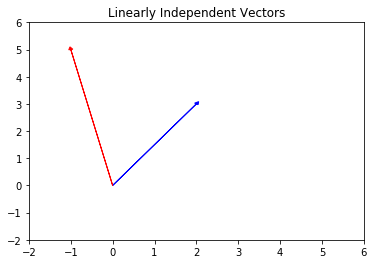

In [0]:
#independent vectors
vector = [2,3]
vector2 = [-1,5]

#set the limits
plt.xlim(-2,6)
plt.ylim(-2,6)

#plot the vectors
plt.arrow(0,0,vector[0],vector[1],head_width=.1,head_length=.1,color='b')
plt.arrow(0,0,vector2[0],vector2[1],head_width=.1,head_length=.1,color='r')

plt.title('Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Since h is merely g multiplied by a scalar, the vectors are linearly dependent, and the span is the line they lay on (y=2x)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The span of {l,m,n} is $\mathbb{R}^{3}$ since it's rank is 3 when put into row-echelon form : 

\begin{align}
LMN = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



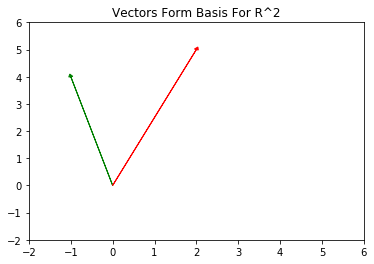

In [0]:
v1 = [-1,4]
v2 = [2,5]

plt.xlim(-2,6)
plt.ylim(-2,6)

plt.arrow(0,0,v1[0],v1[1],head_width=.1,head_length=.1,color='g')
plt.arrow(0,0,v2[0],v2[1],head_width=.1,head_length=.1,color='r')

plt.title('Vectors Form Basis For R^2')
plt.show()

## 6.2 What does it mean to form a basis?

To be linearly independent, and span the specified vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}


step 1: add 1 x the first row to the second row
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

step 2: subtract 4 x the first row from the third row
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

step 3: multiply the second row by 1/2
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

step 4: multiply the 3rd row by -1/10
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

The rank of this matrix is 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us how many dimensions it can span, in this case, P can span $\mathbb{R}^3$

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

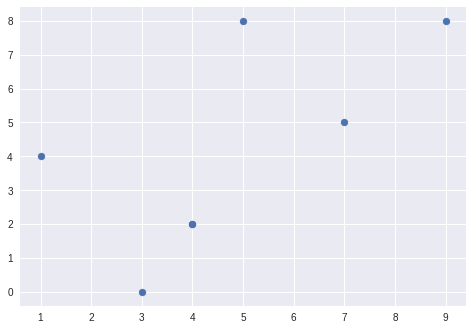

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()